# Convex Hull Algorithm Implementations

In [2]:
%load_ext autoreload
%autoreload 2

import itertools
import timeit
import sys
import numpy as np
import scipy
import scipy.spatial
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
import math
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.collections import PolyCollection
from matplotlib.collections import PatchCollection
from matplotlib import colors
import time
from operator import itemgetter

## 1) Project Description

### 1.1 Introduction

The convex hull is defined as as the intersection of all convex sets containing $X$. For a set of points in 2D, the convex hull can be visualized as the exterior points of a set of points. The angles between all points on the convex hull will be convex.

<img src="258pxConvexHull.png" />

Finding the convex hull of a set of points is one of the fundamental problems of computational geometry. The convex hull has widespread applications underlying many computations, including applications in pattern recognition, robot path planning, graphics, farthest pair statistics, image processing, geographic informations systems and much more. 

There are many different algorithms to compute the convex hull of a set of points, and the choice of the algorithm depends on the type of input data. Some algorithms are output sensitve while others depend only on the total number of points. Some algorithms are constrained by sort time, and therefore would be appropriate to use if input data was pre-sorted. Theoretical time complexities of commonly used algorithms are summarized in the following table:

Algorithm | 2D Complexity | Discovered By
---------|---------------|-------
Brute Force | $O(n^3)$ | ----
Graham scan | $O(n\:{\log}\:n)$ | Graham, 1972
Monotone Chain | $O(n\:{\log}\:n)$ | Andrew, 1979
QuickHull | $O(nh)$ | Eddy, 1977 ; Bykat, 1978
Jarvis March | $O(nh)$ | Jarvis, 1973
Chan's Algorithm | $O(n\:{\log}\:h)$ | Chan, 1993

### 1.2 Project Objectives

The goal of this project is to compare time complexities of convex hull algorithm implementations in different input scenarios.

The convex Hull Algorithms to be tested are:
     - QuickHull
     - brute force
     - Monotone Chain (Andrew)
     - Graham Scan
     - Jarvis March

The different input data scenarios to be tested are:
     - Random data
     - All points on the convex hull
     - All points inside the convex hull, except four corners

## 2) Generating Test Data

Testing will be done with different input arrangements of data. Some of the algorithms run times are affected by the number of points on the hull, so the test cases will be:

    1) Random points
    2) Random points with all points on the hull
    3) Random points with all points inside the hull, except four corners

### 2.1 Generating Random Data

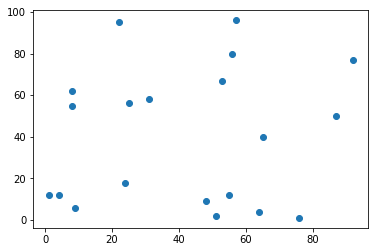

In [3]:
# Function to generate random set of x,y points for convex hull testing
# Inputs:  numPoints = number of points to be generated, maxValue = maximum value in range
# Output: x array and y array of random integers between 0 and maxValue

def randomInt(numPoints, maxValue):
    x = np.random.randint(1, maxValue, numPoints)
    y = np.random.randint(1, maxValue, numPoints)
    # format output
    XY = np.array([x, y])
    XY = XY.transpose()
    return XY

# show the plot
XY = randomInt(20, 100)
plt.plot(XY[:,0], XY[:,1], 'o')

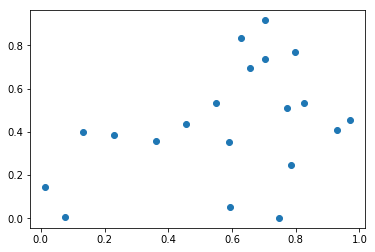

In [4]:
# Function to generate random set of x,y points for convex hull testing
def randomFloat(numPoints):
    XY = np.random.rand(numPoints, 2)
    XY = np.absolute(XY)
    return XY

# show the plot
XY = randomFloat(20)
plt.plot(XY[:,0], XY[:,1], 'o')

### 2.2 All Points On Hull

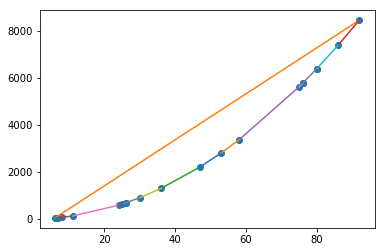

In [5]:
# Function to generate random set of x values and corresponding y values that will result in all points being on convex hull
# Inputs:  numPoints = number of points to be generated, maxValue = maximum value in range
# Output: x array of random integers between 0 and maxValue, y array of x^2

def randomOnHullInt(numPoints, maxValue):
    x = np.random.randint(1, maxValue, numPoints)
    y = x**2
    # format output
    XY = np.array([x, y])
    XY = XY.transpose()
    return XY

# show the plot
XY = randomOnHullInt(20, 100)
plt.plot(XY[:,0], XY[:,1], 'o')

# show convex hull using QuickHull
hull = scipy.spatial.ConvexHull(XY)
for simplex in hull.simplices:
    plt.plot(XY[simplex, 0], XY[simplex, 1])

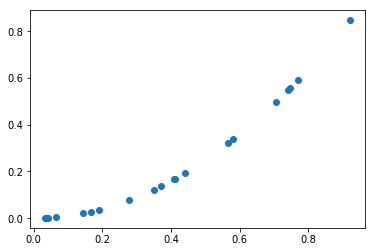

In [6]:
# Function to generate random set of x values
# Corresponding y values that will result in all points being on convex hull
def randomOnHull(numPoints):
    x = np.random.rand(numPoints)
    x = np.absolute(x)
    y = x**2
    # format output
    XY = np.array([x, y])
    XY = XY.transpose()
    return XY

# show the plot
XY = randomOnHull(20)
plt.plot(XY[:,0], XY[:,1], 'o')

### 2.3 All Points Inside Hull

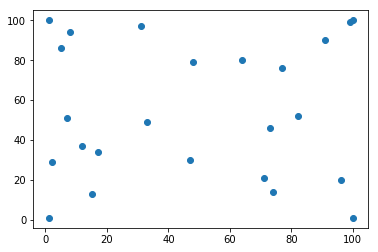

In [7]:
# Function to generate random set of x, y points for convex hull testing, all within four corner points, these four corners will be the only points on the covex hull
# Inputs:  numPoints = number of points to be generated, maxValue = maximum value in range
# Output: x array and y array of random integers between 0 and maxValue, and x,y values of corner points

def randomInHullInt(numPoints, maxValue):
    # generate box to contain all points (corner points)
    xBox = np.array([1, 1, maxValue, maxValue])
    yBox = np.array([1, maxValue, 1, maxValue])
    # generate random points within box
    randX = np.random.randint(1, maxValue, numPoints)
    randY = np.random.randint(1, maxValue, numPoints)
    # merge the arrays
    x = np.concatenate((xBox, randX))
    y = np.concatenate((yBox, randY))
    # format output
    XY = np.array([x, y])
    XY = XY.transpose()
    return XY

# show the plot
XY = randomInHullInt(20, 100)
plt.plot(XY[:,0], XY[:,1], 'o')

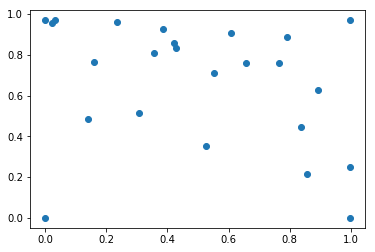

In [8]:
# Function to generate random set of x, y points for convex hull testing
# Will also generate four corners to contain all points
def randomInHull(numPoints):
    # generate random points within box
    randX = np.random.rand(numPoints)
    randX = np.absolute(randX)
    randY = np.random.rand(numPoints)
    randY = np.absolute(randY)
    # generate box to contain all points (corner points)
    xMax = np.amax(randX)
    xBox = np.array([0, 0, xMax, xMax])
    yMax = np.amax(randY)
    yBox = np.array([0, yMax, 0, yMax])
    # merge the arrays
    x = np.concatenate((xBox, randX))
    y = np.concatenate((yBox, randY))
    # format output
    XY = np.array([x, y])
    XY = XY.transpose()
    return XY

# show the plot
XY = randomInHull(20)
plt.plot(XY[:,0], XY[:,1], 'o')

## 3) Algorithm Implementations

The convex hull is defined by being a set of points only convex angles between them. A convex angle between points can also be considered a "left hand" turn, or counter clockwise turn. Because of, this all the implementations of convex hull will require comparing points based on a counter clockwise turn. To compute whether points are counter clockwise, the determinant can be used to simplify the calculation. 

To perform this calculation on points ${\displaystyle P_{1}=(x_{1},y_{1})}$, ${\displaystyle P_{2}=(x_{2},y_{2})}$ and ${\displaystyle P_{3}=(x_{3},y_{3})}$, compute the cross product of the two vectors ${\displaystyle {\overrightarrow {P_{1}P_{2}}}}$ and ${\displaystyle {\overrightarrow {P_{1}P_{3}}}}$, given by the following: ${\displaystyle (x_{2}-x_{1})(y_{3}-y_{1})-(y_{2}-y_{1})(x_{3}-x_{1})}$. If the result of this calculation is positive, these points make up a counterclockwise turn. If the points are collinear, the result will be 0, and positive if the turn is clockwise.

In order to break ties between points in the case of collinear points, the farthest point will be chosen to be on the hull, because the hull only wraps around extreme points. To account for this, the function ccw takes into account both the cross of the two vectors, and also their distance in the event of the tie. 

To facilitate these calculations in all algorithms, the following functions will be used: 

    - cross: 2D cross product used to determine if points make a counter clockwise turn
    - dist: the distance between two points
    - ccw: used to determine a counterclockwise turn, considers collinear points to be "counter clockwise" if the last point is farthest, because then it would be on the convex hull


The main concerns in algorithm implementations are rounding off errors due to floating point errors in calculations, overhead causing slower times despite theoretical fast run times, and properly handling degenerate situations. These functions will be used to counter these issues in the following implementations. 

In [9]:
# Functions used for comparing points in all algorithms

# 2D cross product of OA and OB vectors, i.e. z-component of their 3D cross product.
# Returns a positive value, if OAB makes a counter-clockwise turn,
# negative for clockwise turn, and zero if the points are collinear.
# returns positive if ccw, 0 if colinear
def cross(o, a, b):
    return ((a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0]))

# Returns the squared distance between p and q.
def dist(p, q):
    dx, dy = q[0] - p[0], q[1] - p[1]
    return dx * dx + dy * dy

# returns positive if OAB makes a counter-clockwise turn, 
# or if a and b are co-linear, and b is farther
def ccw(rotatePoint, a, b):
    # either left hand turn, or collinear but farther away
    # in both these cases, this point would be on the hull
    if (cross(rotatePoint, a, b) == 0):
        # will be positive if b is farther
        return dist(rotatePoint, b) - dist(rotatePoint, a)
    else:
        # returns positive if b is counter clockwise from a
        return cross(rotatePoint, a, b)


### 3.1 Brute Force Algorithm

#### Explanation

The simplest algorithm to implement is the brute force algorithm, that compares every possible edge to all points to determine if that edge could be on the convex hull.

Checking each possible edge is an $n^2$ procedure, and then each edge must be checked against all the $n$ possible points, resulting in time complexity of $n^3$. 

The algorithm is implemented using three nested loops to determine the list of edges that would be in the convex hull. Then the output list of edges is then formatted into a list of points in order around the convex hull, to be returned as the convex hull. 

In [10]:
# Brute Force Algorithm Implementation

# Compare every pair of points with all points to see if any are past them
# Returns list of points in order around the convex hull.
def BruteForce(XY):
    CHedges = [] #list to contain convex hull edges
    
    # For each possible edge (p1, p2), check if its on the convex hull
    for p1 in XY:
        for p2 in XY:
            if not(np.array_equal(p1, p2)):
                #start assuming e = (p1, p2) is on hull
                onHull = True
                # check if e = (p1, p2) is on the hull by checking each point, to see if its outside it
                for p3 in XY:  
                    if (not(np.array_equal(p1, p3)) and not(np.array_equal(p2, p3))):
                        # check if p3 would be inside or outside hull, if (p1, p2) is hull edge
                        # if there is a point that makes a ccw turn, then p3 would be outside hull
                        if (ccw(p1, p2, p3) > 0):                            
                            onHull = False
                if (onHull):
                    CHedges.append([p1,p2]) 
    
    # Format list of edges into list of points in order, to be output
    # Construct np array containing points on hull in order from the list of edges    
    CHpoints = []
    CHpoints.append(CHedges[0][1])
    
    # For each edge, find the edge that it connects to, add that point to the list
    currentPoint = CHedges[0][1]
    while not (np.array_equal(currentPoint, CHedges[0][0])):
        for edge in CHedges:
            if np.array_equal(edge[0], currentPoint):
                CHpoints.append(edge[1])
                currentPoint = edge[1]
                break
    
    CHpoints = np.array(CHpoints)
    return CHpoints



[[ 1 10]
 [10 10]
 [10  1]
 [ 1  1]]


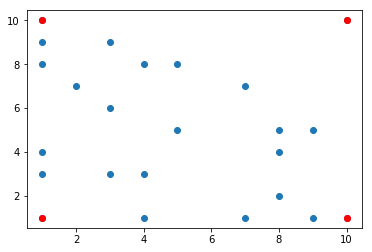

In [11]:
# Testing Brute Force Algorithm

XY = randomInHullInt(20, 10)
plt.plot(XY[:,0], XY[:,1], 'o')

hull = BruteForce(XY)
print(hull)
for p in hull:
    plt.plot(p[0], p[1], 'ro')

### 3.2 Quick Hull Algorithm



#### Explanation

Algorithm:

The quick hull algorithm used is called [QHull](http://www.qhull.org/html/qh-code.htm).

The quickHull algorithm is one of the most widely used algorithms in convex hull implementations, because even though theoretically it's runtime is O$(nh)$, in practice it is usually closer to O$(n)$. This is due to the method of exluding large subsets of points at each step of the algorithm. It works in a way comparable to quick sort (for sorting points in a line), hence the name quick hull. Quick sort's effectiveness is greatly improved by selecting a good partition point for the sort, and the same is true for quick hull. Other advantages of quick hull are its reduced space requirements and good floating-point error handling. 

There are several versions of the quick hull algorithm, involving modifying the way the partition is selected and other details. There are also many variations for higher dimension implementations. The Qhull algorithm for 2D cases implements the Quickhull algorithm  described by Eddy (1977) and Bykat (1978). For higher dimensions, QHull combines the 2-d Quickhull algorithm with the n-d beneath-beyond algorithm  described by  Preparata & Shamos '8, however this project will focus on the 2D case.

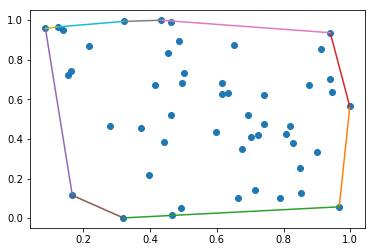

In [12]:
# Quick Hull implementation using qHull 

def quickHull(XY):
    hull = scipy.spatial.ConvexHull(XY)
    return hull

# show the plot
XY = randomFloat(50)
plt.plot(XY[:,0], XY[:,1], 'o')

# show convex hull using Quick Hull
hull = quickHull(XY)
for simplex in hull.simplices:
    plt.plot(XY[simplex, 0], XY[simplex, 1])

### 3.3 Monotone Chain Algorithm

#### Explanation

The monotone chain algorithm, published in 1979 by A. M. Andrew, is a variant of the Graham scan algorithm, which will be explained in the next section. The two algorithms are very similar, excpet the implementation of the monotone chain algorithm is simpler. The main difference arises due to the sorting of the points. Both algorithms require the points to be sorted in a specific order: Andrew's algorithm requires lexicographic sorting, while Graham scan requires sorting by angle from the lowest point. Due to the sorting of the points, both these algorithms take O$(n log n)$, however if the input was already sorted it would be O$(n)$ time.

For Andrew's algorithm, once the points are sorted in lexicographic order, the algorithm then constructs the upper and lower hulls of the points in O$(n)$ time. An upper hull is the part of the convex hull, which is visible from the above. It runs from its rightmost point to the leftmost point in counterclockwise order. Lower hull is the remaining part of the convex hull.

In this implementation, the lower hull is constructed first. It starts by adding the leftmost point to the hull. Then it goes through each point from left to right, adding each point to the hull. If a point gets added to the hull that results in a counterclockwise turn from the previous point, the previous point must not be on the hull, and is removed. It seems as if this would result in O$(n^2)$ time complexity, however each point can only be added and removed from the lower hull at most once, resulting in a runtime of O$(n)$. Each point can appear only once as a point ${\displaystyle (x_{2},y_{2})}$ in a "left turn" (because the algorithm advances to the next point ${\displaystyle (x_{3},y_{3})}$ after that), and as a point ${\displaystyle (x_{2},y_{2})}$ in a "right turn" (because the point ${\displaystyle (x_{2},y_{2})}$ is removed). The overall time complexity is therefore $O(n log n)$ due to the sorting.

This process for constructing the hull repeated once for the lower hull and once for the upper hull. For the upper hull, the algorithms uses the points in the reverse direction starting from the right most point and using the reversed list of points. 

In [13]:
# Build hull for andrew's algorithm and Graham Scan
# starts with hull containing first point (furthest left or lowest)
# takes in points to be added to the hull and removes previous points
# as they are shown to not be on hull due to counterclockwise turn checking
def buildHull(hull, points):
    ind = 1
    for p in points:
        while ind >= 2 and cross(hull[-2], hull[-1], p) <= 0:
            hull.pop()
            ind = ind - 1
        hull.append(p)
        ind = ind + 1

# Andrew's algorithm
# returns points in order around the convex hull
def andrew(points):
    # Sort the points lexicographically
    points = sorted(points, key=itemgetter(0, 1))
    
    if len(points) <= 3:
        return points

    # Build hull, furthest left point is added to hull
    hull = []
    hull.append(points[0])
    
    # build lower hull, starting from second point
    buildHull(hull, points[1:])
    
    # Build upper hull: use reversed points list, exclude furthest right because its already included in the hull
    revPoints = list(reversed(points))[1:]
    buildHull(hull, revPoints) 
 
    # the first and last point will be the same, so exclude last point
    return hull[:-1]
        

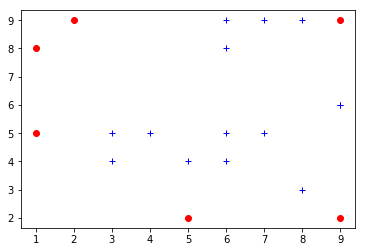

In [14]:
# Testing Andrew's Algorithm
points = randomInt(20, 10)
for point in points:
    plt.plot(point[0], point[1], 'b+')

hull = andrew(points)
    
# Add convex Hull to plot    
for p in hull:
    plt.plot(p[0], p[1], 'ro')

### 3.4 Graham Scan

#### Explanation

Graham scan is the same basic method as Andrew’s Monotone Chain Algorithm but involves sorting by polar angle around the lowest point, instead of x-coordinate. This algorithm also uses python lists to add and remove points from the hull, once concavities in the boundary are detected. In this implementation, the same hull building method as in Andrew's algorithm is used, except it does not need to be called twice for upper and lower hull, as in this situation the hull can be completed all at once.

Polar angle sorting and comparison is more costly and complex in implementation, as compared with Andrew's algorithm sorting by x-coordinate. In order to implement this, a custom class was created for the sorting, to facilitate use of python's built in sorting functions. The class was created to override the ">" comparisons used in a regular sort, to isntead compare based on left or right turn value, using the ccw function. Using this, the points with the most left turns will end up sorted to one side, as it should be in order of angle. This method avoids requiring the computation of the actual angle to sort by, which would be a costly calculation and lead to floating point errors. 

The sorting method used is the method python provides with the "sorted()" function, called "Timsort". Timsort is a combination of merge sort and insertion sort, that is optimized to run efficiently on real world data, by finding subsequences that are already ordered. However, the worst case run time of this is still O$(n log n)$. Therefore the overall time complexity must be O$(n log n)$, for the same reason as Andrew's algorithm.

In [15]:
# point class for use in sorting based on counterclockwise turn

class CCWPoint:

    def __init__(self, coordinates, rotatePoint, *args):
        self.coordinates = coordinates
        self.rotatePoint = rotatePoint        

    def __lt__(self, other):
        return ccw(self.rotatePoint, self.coordinates, other.coordinates) > 0

    def __gt__(self, other):
        return ccw(self.rotatePoint, self.coordinates, other.coordinates) > 0

    def __eq__(self, other):
        return ccw(self.rotatePoint, self.coordinates, other.coordinates) == 0

    def __le__(self, other):
        return ccw(self.rotatePoint, self.coordinates, other.coordinates) <= 0

    def __ge__(self, other):
        return ccw(self.rotatePoint, self.coordinates, other.coordinates) >= 0

    def __ne__(self, other):
        return ccw(self.rotatePoint, self.coordinates, other.coordinates) != 0

    def __str__(self):    
        return "({0}, {1})".format(self.coordinates[0], self.coordinates[1])


In [70]:
def GrahamScan(points):
        
        # sort points b angle from lowest point (the min), using ccw comparison point class
        #points = sorted(points, key=lambda point: CCWPoint(point, min(points, key=itemgetter(0, 1))))  # results in O(n^2)      
        
        # three points will all be a convex hull
        if len(points) <= 3:
            return points
    
        # Build hull, furthest left point is added to hull
        hull = [points[-1], points[0]]
        buildHull(hull, points[1:])

        #points up to hp at end of loop will contain convex hull
        return hull[:-1] 

[[1 9]
 [1 1]
 [7 1]
 [9 6]
 [9 7]
 [7 9]]


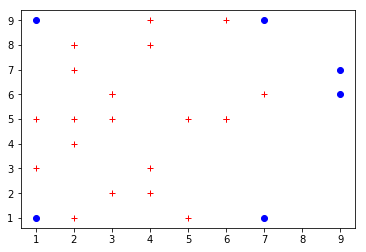

In [69]:
# Testing Graham Scan

points = randomInt(30, 10) 
points = sorted(points, key=lambda point: CCWPoint(point, min(points, key=itemgetter(0, 1))))
hull = GrahamScan(points)
print(np.array(hull))
for p in points:
    plt.plot(p[0], p[1], 'r+-')
for p in hull:
    plt.plot(p[0], p[1], 'bo-')   

### 3.5 Gift-Wrapping

#### Explanation

The gift wrapping algorithm, discovered by Jarvis in 1973, is also known as the Jarvis March. This algorithm has an output sensitive time complexity, as the runtime is affected by the number of points on the hull. 

This idea behind this algorithm is similar to wrapping a gift, where each step of the algorithm involves moving to the next point of the hull like paper around a edges of gift. 

At each point on the convex hull, the algorithm must go through each other point in the list of points to find the next point of the convex hull, therefore, at each point of the hull $h$, there are $n$ comparisons, resulting in a runtime of O$(nh)$. 

The next hull point is found by using the ccw comparisons, and choosing the point with that is a ccw turn from all other points, ie. there are no other points to the left of it from the current hull point. Once this point has been found, it gets added to the hull, and the algorithm proceeds from this point until it gets back to the beginning. 

In [18]:
# finds the next point on the convex hull, using the ccw comparison
def nextHullPt(points, p):
    a = p
    for b in points:
        # returns positive if pqr makes a counter-clockwise turn
        # or if q and r are co-lin, and r is farther (so r would be on the hull and not q)
        if ccw(p, a, b) > 0:
            a = b
    return a

# Jarvis algorithm: takes in random points and returns points along convex hull
def jarvis(points):
    hull = [min(points, key=itemgetter(0, 1))]
    
    for p in hull:
        a = nextHullPt(points, p)
        if not np.array_equal(a, hull[0]):
            hull.append(a)
    return hull

[[ 1  5]
 [ 1 15]
 [ 2 18]
 [ 9 19]
 [19 19]
 [18 10]
 [17  7]
 [14  4]
 [ 8  1]
 [ 2  3]]


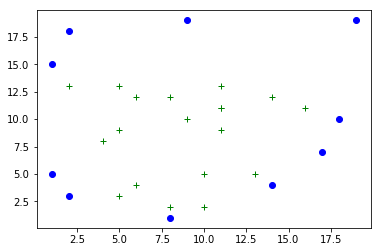

In [19]:
# Testing Jarvis

points = randomInt(30, 20)
for point in points:
    plt.plot(point[0], point[1], 'g+')

# Calculate convex hull
hull = jarvis(points)
for p in hull:
    plt.plot(p[0], p[1], 'bo')
    
print(np.array(hull))

## 4) Testing Implementations

### 4.1 Functions to Time Algorithms

The algorithms were timed with a range of input sizes, and the results of this was graphed and fit to a curve using the scipy curvefit. The relationships between time and number of input points was analyzed by the curve fit, to determine whether the implementations are displaying their theoretical runtimes: O$(n)$, O$(n log n)$, O$(n^2)$, and O$(n^3)$.

Timing:

The timing was done using pythons built in time function: time(). To facilitate the testing, the timeTester function was created. This function enables easily specifying the test conditions in the testing section. 

    timeTester(dataGen, algo, numPointsList) 
       - dataGen: type of data generator
       - algo: convex hull algorithm
       - numPointsList: list of number of points to be tested
       
Due to variability in results, timeTesterMin was also created, to enable testing the same set of data multiple times and choosing the minimum value for the results, to try and eliminate variability caused by the computer causing interference during the computation. using the fastest possible time would enable this analysis to compare to theoretical time complexities. 

Graphing:

Due to the many settings required to customize graphs using matplotlib, a graphing function was created to facilitate the fitting the data to a curve and the graphing of the results. The graphing function analyzes the curve fit based on several models: linear, loglinear, quadratic, cubic

These functions are used to fit the data using the scipy.optimize.curvefit functionality. The fits are assessed using the standard error and this value is used to determine which fit curve is graphed alongside the data. the best fitted curves are shown in the graph.

    plotResults(points_list, list_times): input is timed results and the numbers of points tested, produces graph with data and fitted curves

In [73]:
# Function to time each algorithm with each type of generated data
def timeTester(dataGen, algo, numPointsList):
    list_times = []
    for numPoints in numPointsList:
        points = dataGen(numPoints) 
        
        #calculate elapsed time for current number of points
        start_time = time.time()
        hull = algo(points)
        elapsed_time = time.time() - start_time
        list_times.append(elapsed_time) 
    return list_times

# Tester to test GS without sort because sort causes O(n^2) runtime
def timeTesterGS(dataGen, algo, numPointsList):
    list_times = []
    for numPoints in numPointsList:
        points = dataGen(numPoints) 
        points = sorted(points, key=lambda point: CCWPoint(point, min(points, key=itemgetter(0, 1))))
        
        #calculate elapsed time for current number of points
        start_time = time.time()
        hull = algo(points)
        elapsed_time = time.time() - start_time
        list_times.append(elapsed_time) 
    return list_times

def timeTesterMin(dataGen, algo, numPointsList):
    list_times = []
    for numPoints in numPointsList:
        points = dataGen(numPoints) 
        
        #calculate elapsed time for current number of points, using min of 3 times
        elapsed_time = 1000 #initialize it high, so min will be taken in first loop
        for i in range(10):
            start_time = time.time()
            hull = algo(points)
            elapsed_time = min(elapsed_time, time.time() - start_time)
                
        list_times.append(elapsed_time) 
    return list_times


# Functions to model results  of time vs number of points to empirically determine time complexity
def linear(n, m, c):
    return m * n + c

def loglinear(n, m, c):
    return m * (n * np.log(n)) + c

def quadratic(n, m, c):
    return m * (n ** 2) + c

def cubic(n, m, c):
    return m * (n ** 3) + c

# Function to plot results from the calculated times for each point in points_list
def plotResults(points_list, list_times):     
    
    # Set up figure, plot data
    fig_bench_hull = plt.figure()
    ax = fig_bench_hull.add_subplot(111)
    ax.scatter(points_list, list_times, c='k', label='original data', s = 80)
    
    # Calculate fit results to model results   
    popt1, pcov1 = scipy.optimize.curve_fit(linear, points_list, list_times)
    linear_y_data = linear(np.array(points_list), popt1[0], popt1[1])
    residuals = list_times - linear_y_data
    ss_res_linear = np.sum(residuals**2) # can be used to compare best fit curve
    ss_tot = np.sum((list_times - np.mean(list_times))**2)
    r_squared = 1 - (ss_res_linear/ss_tot)
    
    popt2, pcov2 = scipy.optimize.curve_fit(loglinear, points_list, list_times)
    loglinear_y_data = loglinear(np.array(points_list), popt2[0], popt2[1])
    residuals = list_times - loglinear_y_data
    ss_res_loglinear = np.sum(residuals**2)
    
    popt3, pcov3 = scipy.optimize.curve_fit(quadratic, points_list, list_times)
    quadratic_y_data = quadratic(np.array(points_list), popt3[0], popt3[1])
    residuals = list_times - quadratic_y_data
    ss_res_quadratic = np.sum(residuals**2)
    
    popt4, pcov4 = scipy.optimize.curve_fit(cubic, points_list, list_times)
    cubic_y_data = cubic(np.array(points_list), popt4[0], popt4[1])
    residuals = list_times - cubic_y_data
    ss_res_cubic = np.sum(residuals**2)
    
    bestfit = min(ss_res_linear, ss_res_loglinear, ss_res_quadratic, ss_res_cubic)
    print("linear ", ss_res_linear, "loglinear", ss_res_loglinear)
    print("quad ", ss_res_quadratic, "cubic", ss_res_cubic)
    
    linLabel = "linear ss_res =" + str(round(ss_res_linear, 8))
    logLabel = "loglinear ss_res =" + str(round(ss_res_loglinear, 8))
    quadLabel = "quadratic ss_res =" + str(round(ss_res_quadratic, 8))
    cubLabel = "cubic ss_res =" + str(round(ss_res_cubic, 8))
    
    # Plot modelled results
    if(round(ss_res_linear/bestfit, 0) == 1):
        ax.plot(points_list, linear_y_data, c = 'black', lw=3,alpha = 0.3, label = linLabel)
    if(round(ss_res_loglinear/bestfit, 0) == 1):
        ax.plot(points_list, loglinear_y_data, c = 'red', lw=3,alpha = 0.3, label = logLabel)
    if(round(ss_res_quadratic/bestfit, 0) == 1):
        ax.plot(points_list, quadratic_y_data, c = 'green', lw=3,alpha = 0.3, label = quadLabel)
    if(round(ss_res_cubic/bestfit, 0) == 1):
        ax.plot(points_list, cubic_y_data, c = 'blue', lw=3,alpha = 0.3, label = cubLabel)
    ax.legend(loc=2)
    
    # set graph params
    ax.set_title('Time Complexity Assessment\nFor 2D Convex Hull')
    xmin = np.amin(points_list)
    ymin = np.amin(list_times)    
    xlim = np.amax(points_list)
    ylim = np.amax(list_times)
    ax.set_xlim(xmin, xlim)
    ax.set_ylim(ymin, ylim)
    ax.set_xlabel('# Points',fontsize=16)
    ax.set_ylabel('Time (s)', fontsize=16)
    fig_bench_hull.set_size_inches(10,10)

### 4.2 Testing the Algorithms

Each algorithm implementation will be tested in each of the three input data scenarios:

    1) Random data
    2) All points inside the hull, except four corners
    3) All points on the hull
        
These test conditions will enable comparison between the output sensitive algorithms and the algorithms with time complexities that depend only on the number of points total.

The graphs will show the raw data and the curves best fit to the data to assess time complexity.

#### Brute Force

linear  1.16292083627 loglinear 0.851030617954
quad  0.23417316377 cubic 0.00482661678311


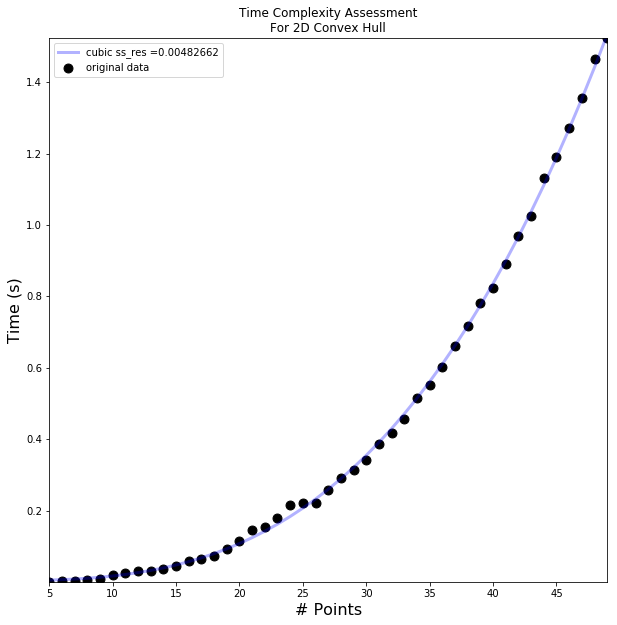

In [21]:
points_list = np.arange(5, 50)

# BruteForce
list_times = timeTester(randomFloat, BruteForce, points_list)
plotResults(points_list, list_times)


linear  2.43475849746 loglinear 1.73263791008
quad  0.459540551761 cubic 0.222452780331


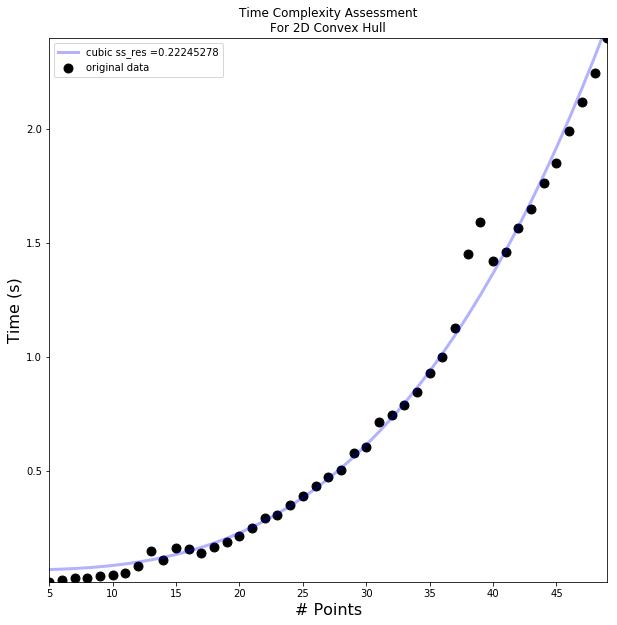

In [22]:
points_list = np.arange(5, 50)

list_times = timeTester(randomInHull, BruteForce, points_list)
plotResults(points_list, list_times)

linear  1.95449388222 loglinear 1.4613163509
quad  0.472046675107 cubic 0.0698831091409


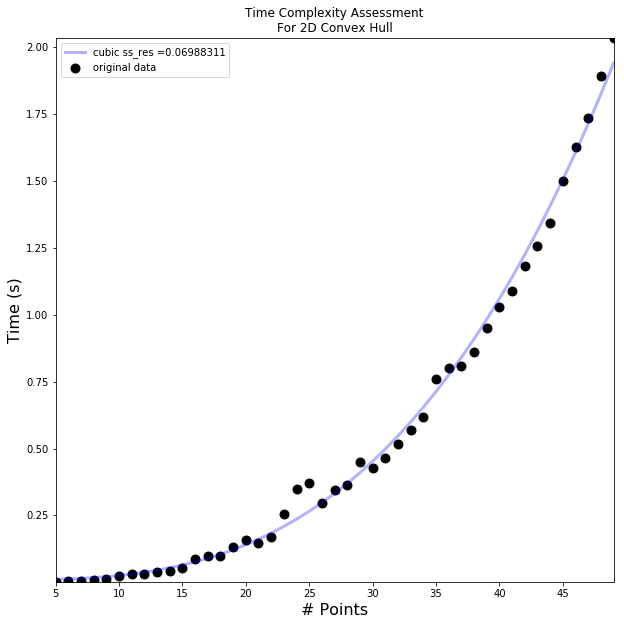

In [23]:
points_list = np.arange(5, 50)

list_times = timeTester(randomOnHull, BruteForce, points_list)
plotResults(points_list, list_times)

#### Quick Hull

linear  6.49119665064e-06 loglinear 7.06100502107e-06
quad  2.08955214533e-05 cubic 4.04212274367e-05


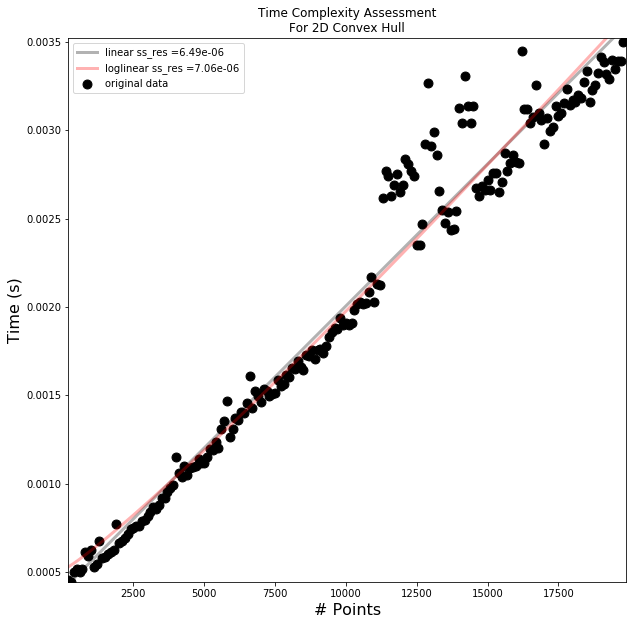

In [24]:
# testing quick hull with min of trial times to reduce variability

points_list = np.arange(200, 20000, 100)
list_times = timeTesterMin(randomFloat, quickHull, points_list)
plotResults(points_list, list_times)

linear  8.47174895616e-06 loglinear 8.61654887543e-06
quad  2.16980222357e-05 cubic 4.33632618841e-05


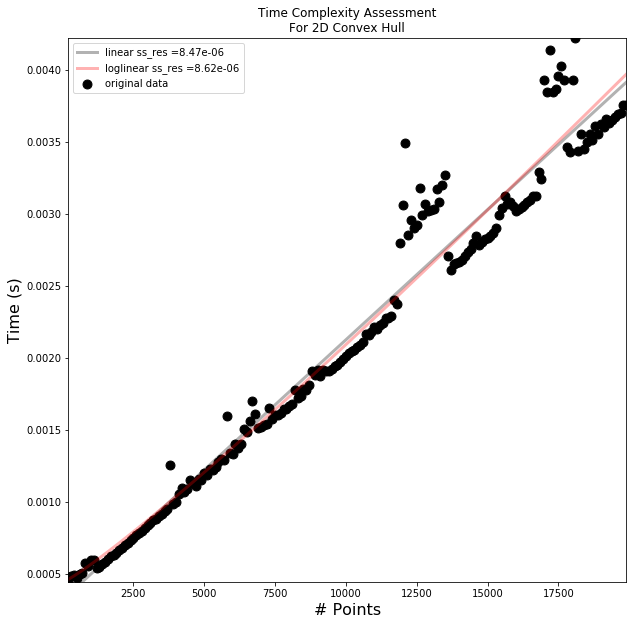

In [25]:
# testing quick hull with min of trial times to reduce variability

points_list = np.arange(200, 20000, 100)
list_times = timeTesterMin(randomInHull, quickHull, points_list)
plotResults(points_list, list_times)

linear  0.00252775376983 loglinear 0.00211511102547
quad  0.00170582750111 cubic 0.00430604677469


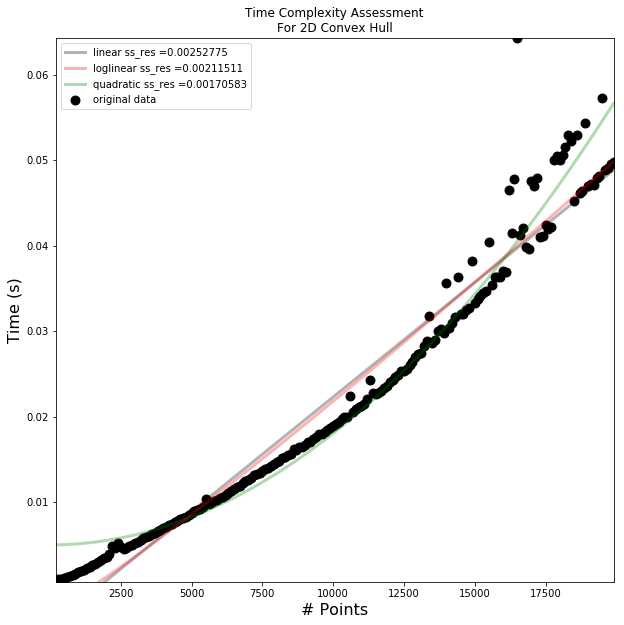

In [26]:
# testing quick hull with min of trial times to reduce variability

points_list = np.arange(200, 20000, 100)
list_times = timeTesterMin(randomOnHull, quickHull, points_list)
plotResults(points_list, list_times)

#### Andrew Algorithm

linear  0.0206917988841 loglinear 0.0202657321989
quad  0.0317836031338 cubic 0.0605973790961


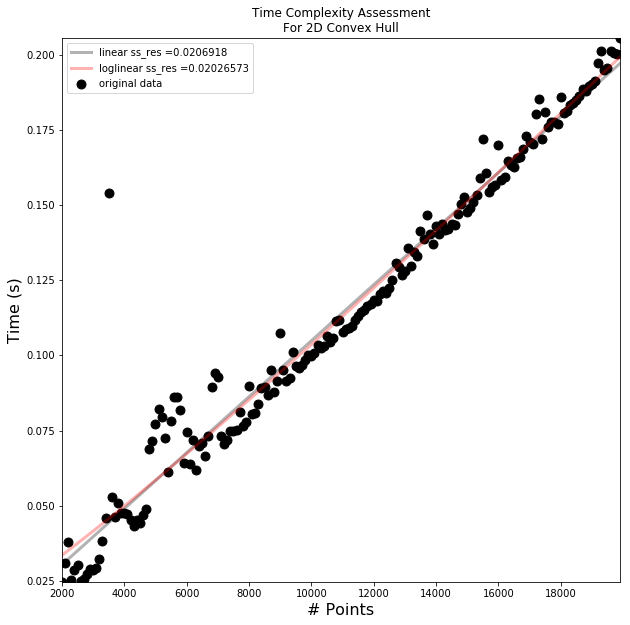

In [58]:
points_list = np.arange(2000, 20000, 100)

list_times = timeTester(randomFloat, andrew, points_list)
plotResults(points_list, list_times)

linear  0.0250721236795 loglinear 0.0232474734323
quad  0.0284234920797 cubic 0.057659978593


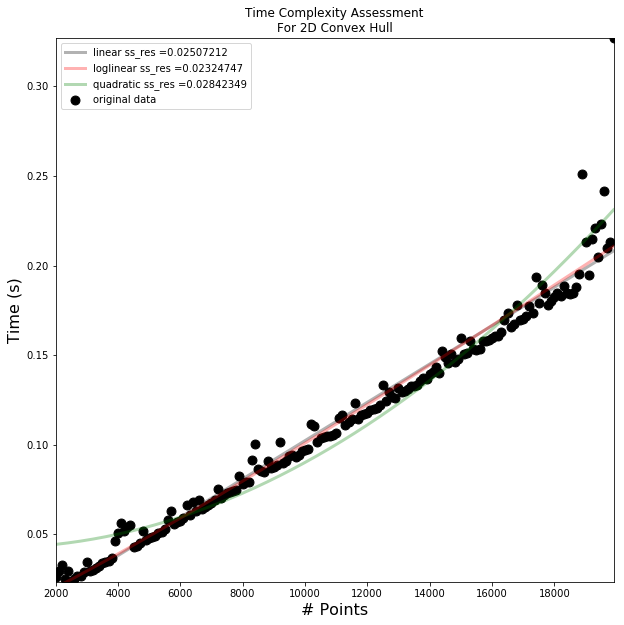

In [59]:
points_list = np.arange(2000, 20000, 100)

list_times = timeTester(randomInHull, andrew, points_list)
plotResults(points_list, list_times)

linear  0.00169590286825 loglinear 0.00140885355314
quad  0.00663918832699 cubic 0.020393801917


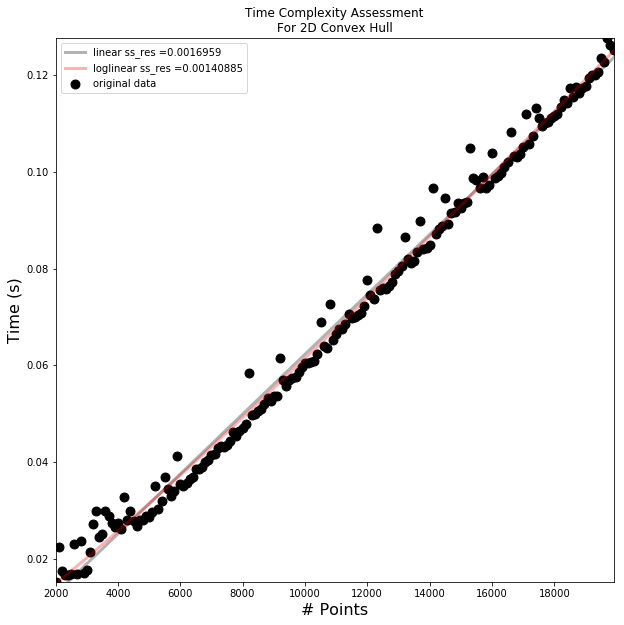

In [60]:
points_list = np.arange(2000, 20000, 100)

list_times = timeTester(randomOnHull, andrew, points_list)
plotResults(points_list, list_times)

#### Graham Scan

linear  2.6637601655e-05 loglinear 2.57520139971e-05
quad  3.22682830189e-05 cubic 5.22433757149e-05


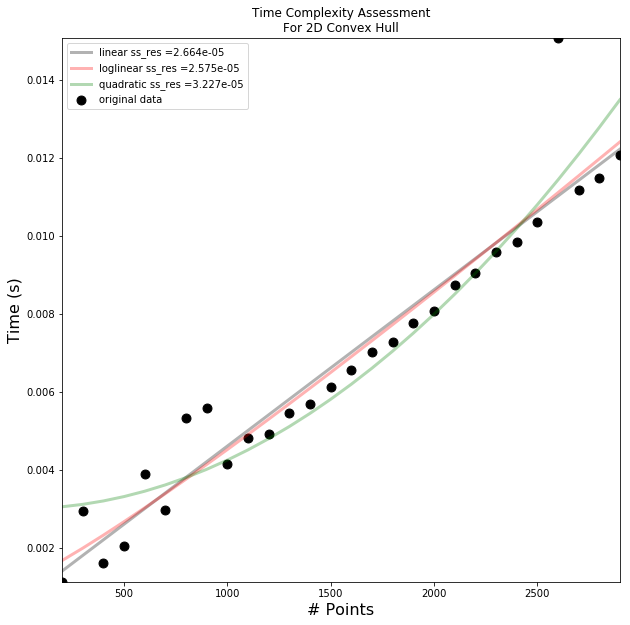

In [72]:
points_list = np.arange(200, 3000, 100)

list_times = timeTesterGS(randomFloat, GrahamScan, points_list)
plotResults(points_list, list_times)

linear  0.714092930703 loglinear 0.589899311391
quad  0.219536389905 cubic 0.409773072058


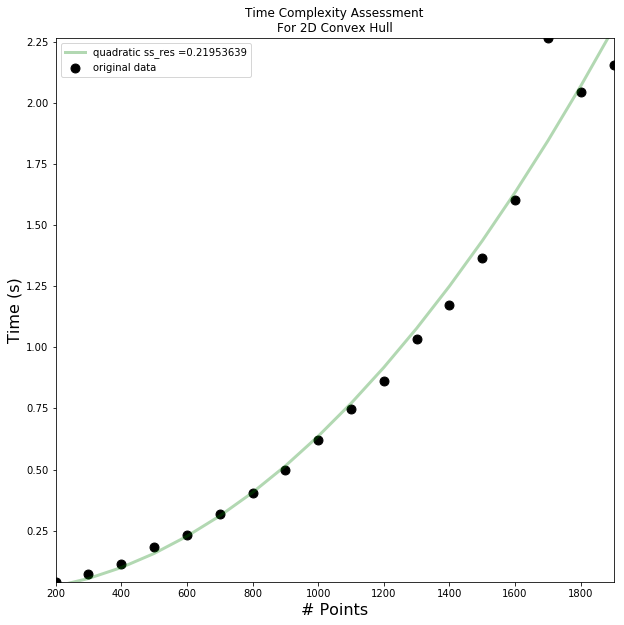

In [42]:
points_list = np.arange(200, 2000, 100)

list_times = timeTester(randomInHull, GrahamScan, points_list)
plotResults(points_list, list_times)

linear  0.309453186301 loglinear 0.222014844773
quad  0.00845148133796 cubic 0.232737239935


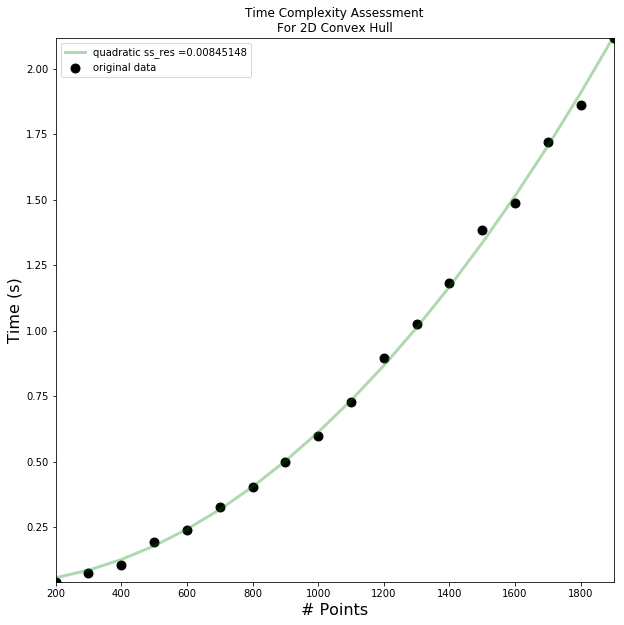

In [43]:
points_list = np.arange(200, 2000, 100)

list_times = timeTester(randomOnHull, GrahamScan, points_list)
plotResults(points_list, list_times)

#### Jarvis

linear  0.176719158332 loglinear 0.174222163649
quad  0.253868231618 cubic 0.43240816103


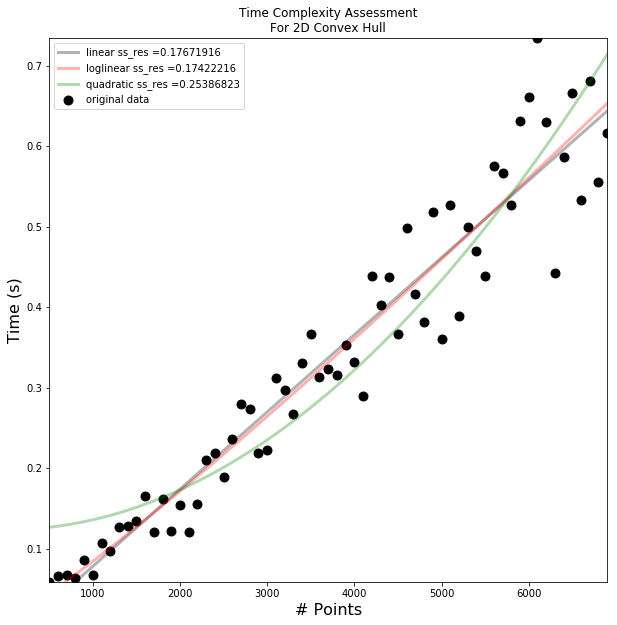

In [50]:
points_list = np.arange(500, 7000, 100)

list_times = timeTester(randomFloat, jarvis, points_list)
plotResults(points_list, list_times)

linear  0.00724460912201 loglinear 0.00752331441562
quad  0.013647242319 cubic 0.0232092888762


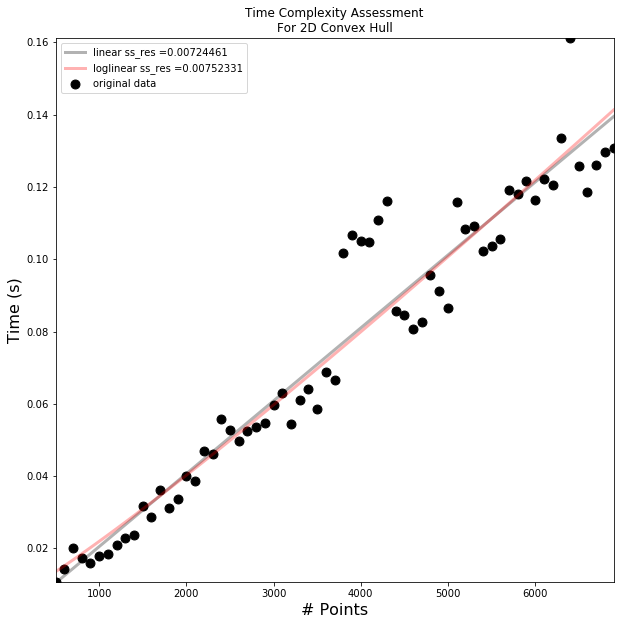

In [51]:
points_list = np.arange(500, 7000, 100)

list_times = timeTester(randomInHull, jarvis, points_list)
plotResults(points_list, list_times)

linear  0.608965728134 loglinear 0.438773225587
quad  0.0124192396455 cubic 0.473364515476


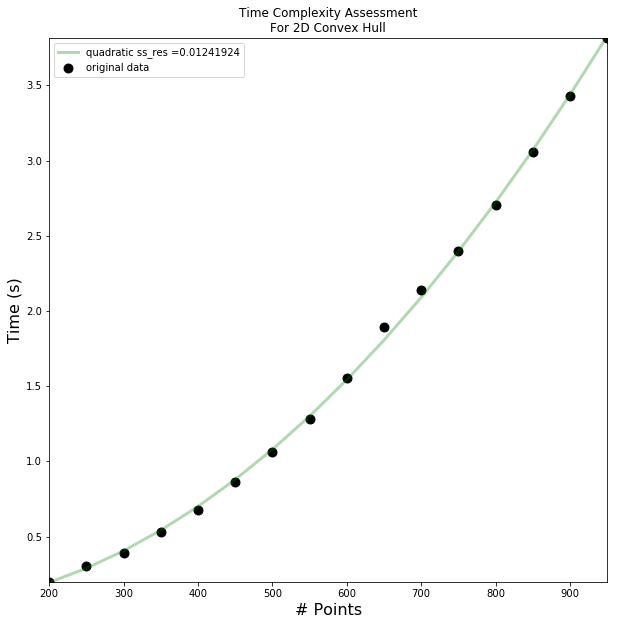

In [57]:
points_list = np.arange(200, 1000, 50)

list_times = timeTester(randomOnHull, jarvis, points_list)
plotResults(points_list, list_times)

## Conclusions

The results from the timing of the implementations, compared to the theoretical results is as follows:

Algorithm | Theoretical | Random Data | Points in Hull | Points on the Hull | Average point/s| Notes
---------|---------------|-------------|---------------|--------------------|----------------|-----
Brute Force | $O(n^3)$ | $O(n^3)$ | $O(n^3)$ | $O(n^3)$ | 50 | Clearly $O(n^3)$
Graham scan | $O(n\:{\log}\:n)$ | $O(n^2)$ | $O(n^2)$ | $O(n^2)$ | 1000 | Should be $O(n\:{\log}\:n)$
Monotone Chain | $O(n\:{\log}\:n)$ | $O(n)$, $O(n\:{\log}\:n)$ | $O(n)$, $O(n\:{\log}\:n)$| $O(n)$, $O(n\:{\log}\:n)$ | 5 x $10^5$ | Variability in results, uncertain fit
QuickHull | $O(nh)$ | $O(n)$, $O(n\:{\log}\:n)$ | $O(n)$, $O(n\:{\log}\:n)$| $O(n)$, $O(n\:{\log}\:n)$, $O(n^2)$ | 5 x $10^5$ - 5 x $10^6$ | Variability in results, uncertain fit
Jarvis March | $O(nh)$ | $O(n)$, $O(n\:{\log}\:n)$, $O(n^2)$ | $O(n)$, $O(n\:{\log}\:n)$| $O(n^2)$ | 500 - 5 x $10^4$ | Progresses from  $O(n)$ to $O(n^2)$ with more points on the hull


There is a lot of variability in the data for faster algorithms. To improve this, adjust the number of points being tested, and implement taking the min of several measurements with the min tester. 

The time per point is by far the fastest with quick hull and by far the slowest with brute force. The output sensitive theoretical time complexities can be seen in the results, and quick hull and jarvis march are both significantly slower with all points on the hull. 